# Haritesh Rathod

# Task 2

# Prediction Using Unsupervised ML

This task describes the various clusters present in the Iris Dataset

# Importing the libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

* Loading The Iris Dataset

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) # See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


* Finding the optimum number of clusters for k-means classification

In [4]:
x = iris_df.iloc[:, [0,1,2,3]].values

In [7]:
from sklearn.cluster import KMeans
wcss = []

In [8]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

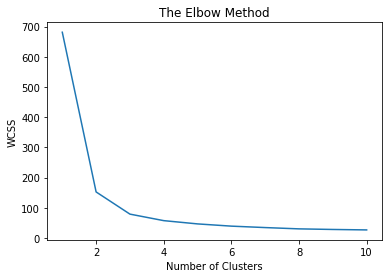

In [9]:
# Plotting the results onto a line graph
# Allowing us to observe 'The Elbow'
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares.
plt.show()

* You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

* Applying kmeans to the dataset / creating the kmeans classifier

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

* Visualizing the Clusters.

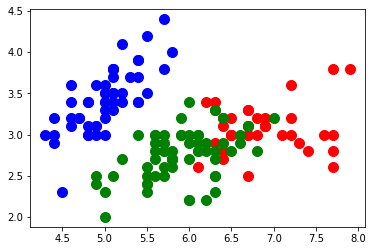

In [11]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1],s=100, c='red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c = 'blue', label = 'Iris Versicolor')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Iris Virginica')

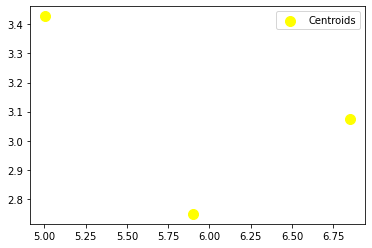

In [13]:
#Plotting the Centroids of the Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c = 'yellow', label = 'Centroids')

plt.legend()